# **INTRODUCTION**

***Heart disease is the leading cause of death among all other disease, even cancers. Due to lack of resources in the medical field, the prediction of heart disease occasionally may be a problem. Utilisation of suitable technology support in this regard can prove to be highly beneficial to the medical fraternity and patients. The machine learning techniques can be very well adapted to do the prediction of heart disease. The Machine Learning model utilizes the data such as blood pressure, cholesterol, diabetes and then tries to predict the possible heart disease in patients. This may help in taking preventive measures and hence can try to avoid the possibility of heart disease in patient. So, when a patient is predicted as positive for heart disease, then the medical data for the patient can be closely analysed by the doctors.
Some Advantages of the Machine Learning model for Heart Disease are 1.Early prediction of heart disease can be done, 2.The cost of medication will be minimised, 3.Accuracy rate will be high and 4. will have High Performance.
***

# **ABOUT THE DATASET**

* Description:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer-valued from 0 (no presence) to 4.

*  Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict whether or not the patients have Heart Disease.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


# **TABLE OF CONTENTS**


**1.IMPORTING LIBRARIES**

**2.LOADING DATASET**

**3.READING DATA**

**4.EXPLORATORY DATA ANALYSIS**

**5.CORRELATION**

**6.DATA PREPARATION**

**7.MODEL BUILDING**

**8.MODEL COMPARISON**

**9.CASE PREDICTION**


# **1.IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
import pickle

# **2. LOADING DATASET**

In [ ]:
data1=pd.read_csv("/content/heart (1).csv")
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1




**Attributes description.**

  1. age :-Age of the patient.       
  
  2. sex :- Sex of the patient(0=women,1=male).  
  
  3. cp :- Chest pain type(0=typical angina,1=atypical angina,2=non-anginal         pain,3=asymptomatic).
  
  4. trestbps :- Resting blood pressure.   
  
  5. chol :- Cholesterol in mg/dl.      
  
  6. fbs :- Fasting Blood Sugar(0 = not present; 1 =present).   
  
  7. restecg :- Resting electrocardiographic(ECG) results.
   (0 = normal, 1 = abnormal ST-T Wave (mild symptoms to severe problems signals non-   normal heart beat), 2 = Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber (severe condition) 
  
  8. thalach :- maximum heart rate achieved    
  
  9. exang :- exercise-induced angina pectoris (1 - yes; 0 - no) 
 pectoris (a disease marked by brief sudden attacks of chest pain or discomfort caused by deficient oxygenation of the heart muscles usually due to impaired blood flow to the heart)
          
  10. oldpeak :-  ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
  
  11. slope :- the slope of the peak exercise ST segment   
          (0: Upsloping: it shows better heart rate with exercise (uncommon)
           1: Flatsloping: it shows the minimal change (typical healthy heart)
           2: Downslopins: it shows the signs of unhealthy heart)   
           
  12. ca :- Number of major blood vessels with a fluorescent colour (0-4).
            (Fluorescent colour is mainly associated with diabetes)  
  
13. thal :- Thalium stress result. *(The results of this test will tell you about the flow of blood                to your heart through your coronary arteries).
             (0,1: normal, 2: fixed defect: used to be defect but ok now
               3: reversable defect: no proper blood movement when exercising)
          
  14. target :-  Have Heart disease or not (0=no, 1=yes)    


In [ ]:
data1.shape

(303, 14)

**In this Dataset there are 303 Indices and 14 attribute.
9 categorical variables and 5 continuous variables are there.**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### All the features are in the numerical format.

In [ ]:
data1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### There is no null values in the Dataset. 

In [ ]:
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **4. EXPLORATORY DATA ANALYSIS**

In [ ]:
data1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: title={'center': 'HEART DISEASE DISTRIBUTION'}, ylabel='target'>

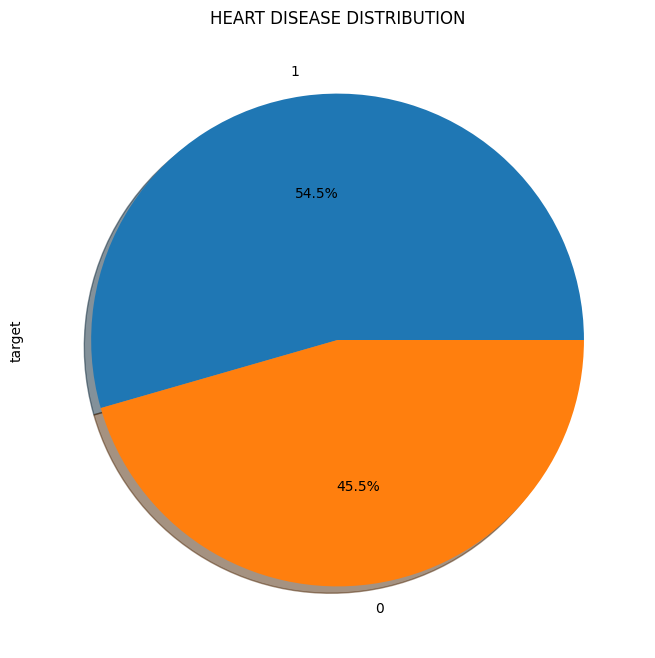

In [ ]:
plt.title('HEART DISEASE DISTRIBUTION')
data1['target'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=True)

### Observation

### The total number of patients who have heart diseases are higher than that of the patients have no heart diseases.
### This dataset is slightly imbalanced.

<Axes: title={'center': 'Age Vs Heart Disease'}, xlabel='target', ylabel='age'>

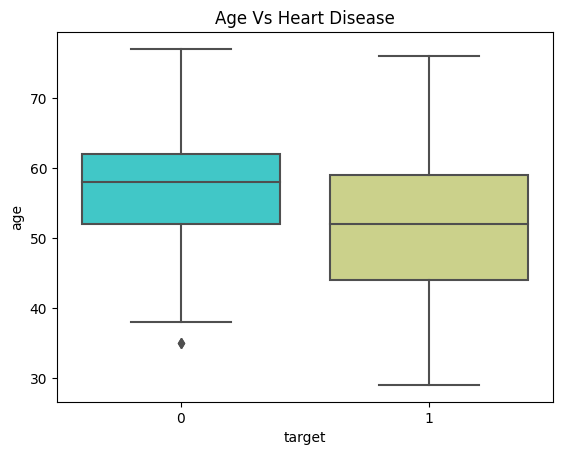

In [ ]:
plt.title('Age Vs Heart Disease')
sns.boxplot(x='target', y='age', data=data1,palette='rainbow')

### Observation

### There is an outlier at the lower part of the box plot of age group who don't have heart                 disease.
### Mean age for people who don't have heart disease higher than that of the other category.

In [ ]:
data1.groupby(['sex'])['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

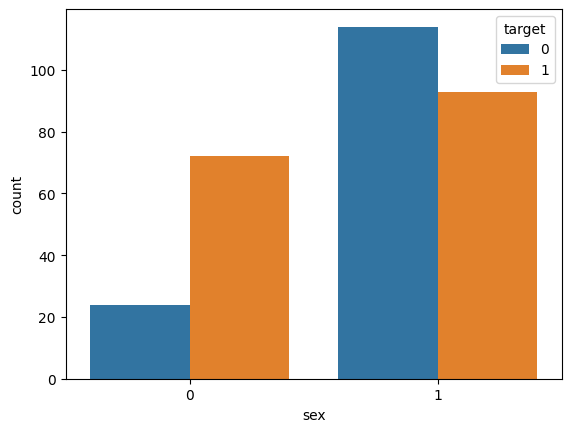

In [ ]:
sns.countplot(x=data1['sex'],hue=data1['target'])

### Observation
### From the above count plot we can see that males have a very high risk of getting heart disease than female.

<Axes: title={'center': 'Chest Pain Type'}, ylabel='cp'>

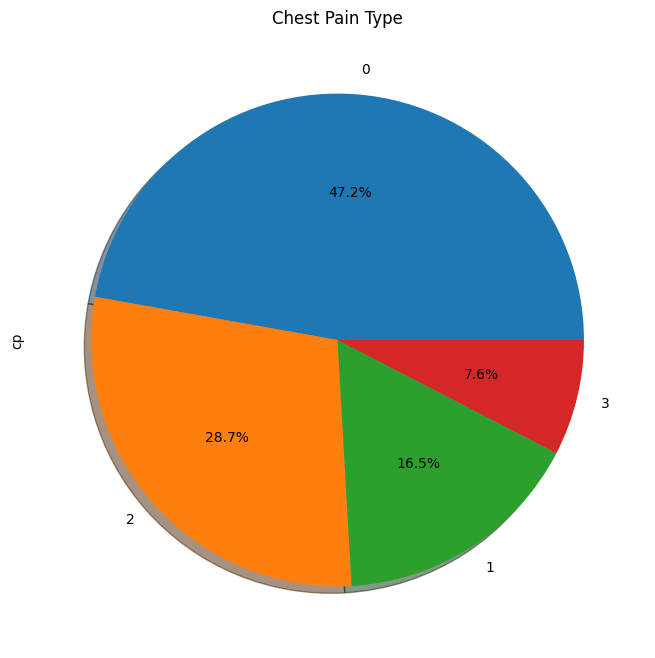

In [ ]:
plt.title("Chest Pain Type")
data1['cp'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(8,8),shadow=True)

### Observation
### Chest pain type 0(typical angina) have the highest number and chest pain type 3 (asymptomatic) have the lowest number compared to other chest pain types.

<Axes: xlabel='target', ylabel='trestbps'>

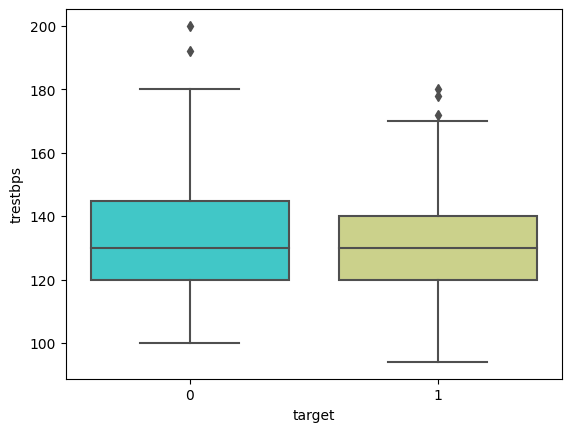

In [ ]:
sns.boxplot(x='target', y='trestbps', data=data1,palette='rainbow')

### Observation
###  From the above box plot we can see that there are outliers at the upper part of the boxplot in both the categories. 
###  The Mean value of both the resting blood pressue types almost equal. 

<Axes: xlabel='target', ylabel='chol'>

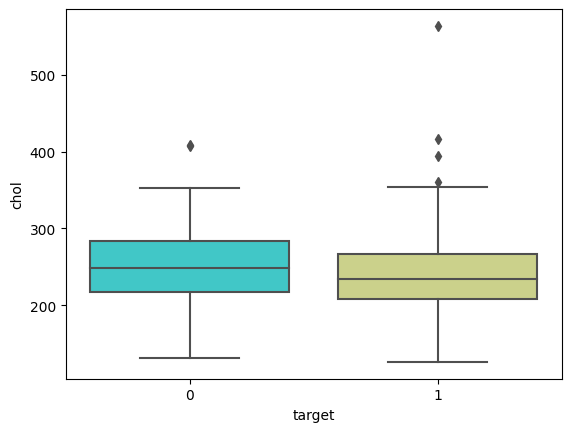

In [ ]:
sns.boxplot(x='target', y='chol', data=data1,palette='rainbow')

### Observation
### Mean Value of cholestrole for people who don't have heart disease is slightly higher than that of the mean value of cholestrole for the people who have heart disease.
### There are some outliers in the upper part of both boxplots.

<Axes: xlabel='age', ylabel='chol'>

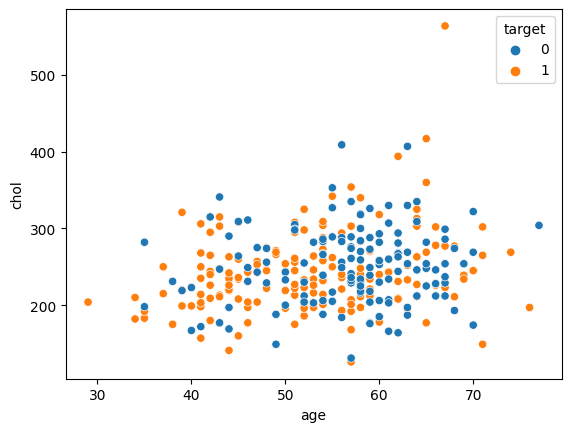

In [ ]:
sns.scatterplot(data=data1, x="age", y="chol", hue="target")

### Observation
### Number of Peoples who have high Cholestrole are between the age group 45 and 70.

In [ ]:
data1.groupby(['fbs'])['target'].value_counts()

fbs  target
0    1         142
     0         116
1    1          23
     0          22
Name: target, dtype: int64

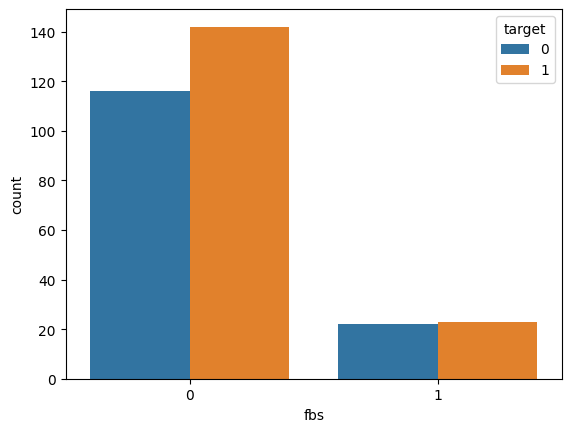

In [ ]:
sns.countplot(x=data1['fbs'],hue=data1['target'])
plt.show()

### Observation
### People have no fasting blood suger rate have a high risk of getting heart disease.

<Axes: xlabel='target', ylabel='thalach'>

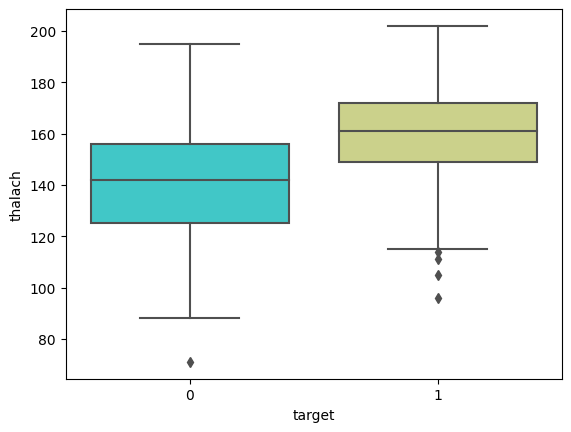

In [ ]:
sns.boxplot(x='target', y='thalach', data=data1,palette='rainbow')

### Observation
### People who have maximum heart rate have a high risk of getting heart disease.
### Some Outliers are detected at the lower part of the both boxplots.

<Axes: xlabel='target', ylabel='thalach'>

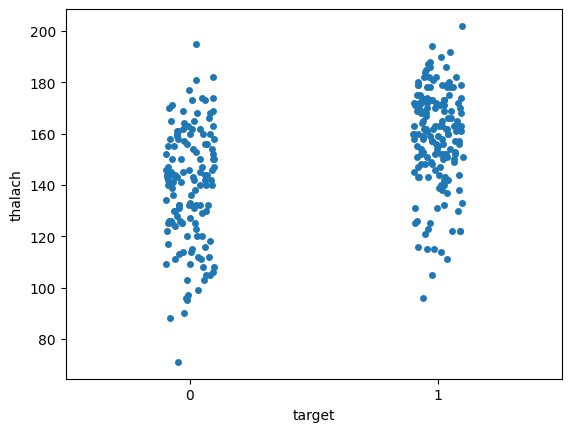

In [ ]:
sns.stripplot(x="target", y="thalach", data=data1)

<Axes: xlabel='age', ylabel='thalach'>

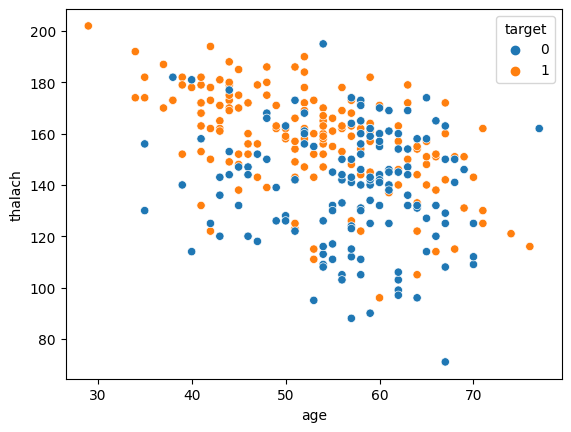

In [ ]:
sns.scatterplot(data=data1, x="age", y="thalach", hue="target")

### Observation
### People who have detected maximum heart rate have a high risk of getting heart disease.
### People who have detected maximum heart rate falling under the age group between 40 and 60.

In [ ]:
data1.groupby(['exang'])['target'].value_counts()

exang  target
0      1         142
       0          62
1      0          76
       1          23
Name: target, dtype: int64

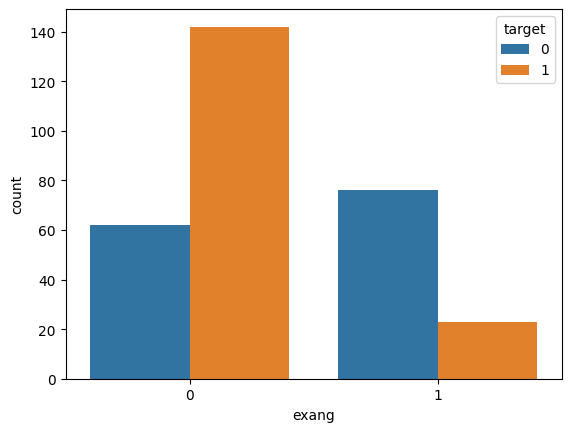

In [ ]:
sns.countplot(x=data1['exang'],hue=data1['target'])
plt.show()

### Observation
### People who have no exercise-induced angina pectoris have a very high rate of getting heart disease. 

<Axes: xlabel='target', ylabel='oldpeak'>

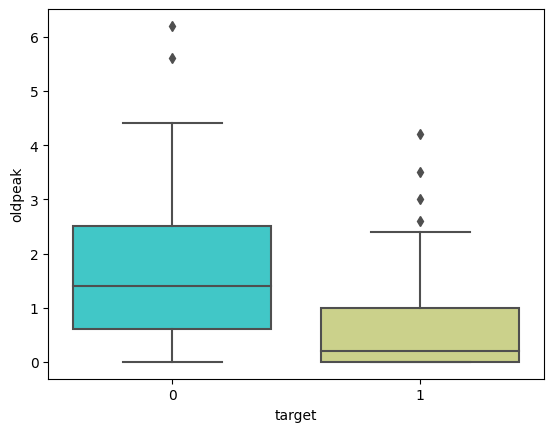

In [ ]:
sns.boxplot(x='target', y='oldpeak', data=data1,palette='rainbow')

### Observation
### Peoples with low 'ST depression induced by exercise relative to rest' have a high risk of getting heart disease.
### Some outliers are seen in the upper part of both the categories. 

In [ ]:
data1.groupby(['slope'])['target'].value_counts()

slope  target
0      0          12
       1           9
1      0          91
       1          49
2      1         107
       0          35
Name: target, dtype: int64

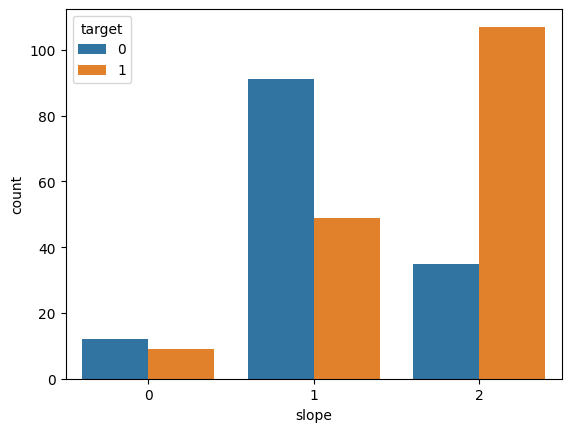

In [ ]:
sns.countplot(x=data1['slope'],hue=data1['target'])
plt.show()

### Observation
### People who have a unhealthy heart(slope=2) have a high risk of getting heart disease.

In [ ]:
data1.groupby(['ca'])['target'].value_counts()

ca  target
0   1         130
    0          45
1   0          44
    1          21
2   0          31
    1           7
3   0          17
    1           3
4   1           4
    0           1
Name: target, dtype: int64

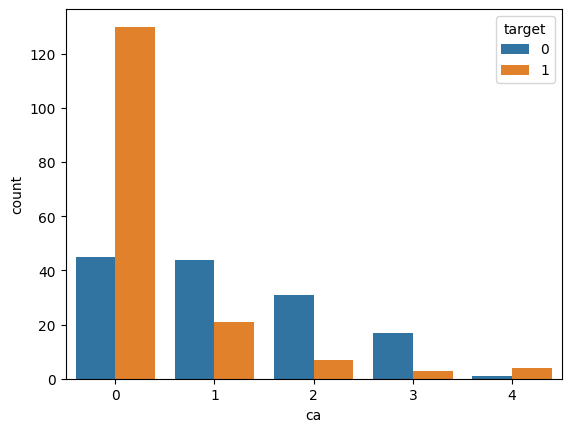

In [ ]:
sns.countplot(x=data1['ca'],hue=data1['target'])
plt.show()

### Observation
### People who have ca value=4(number of major vessels colored by flourosopy) high risk of getting heart disease.

In [ ]:
data1.groupby(['thal'])['target'].value_counts()

thal  target
0     0           1
      1           1
1     0          12
      1           6
2     1         130
      0          36
3     0          89
      1          28
Name: target, dtype: int64

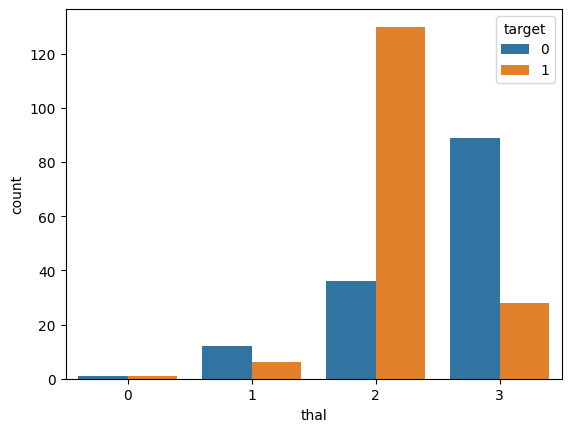

In [ ]:
sns.countplot(x=data1['thal'],hue=data1['target'])
plt.show()

### Observation
### People who have thal value '2' have high risk of getting heart disease.

# **5. CORRELATION**

### Correlation map/heatmap of numerical variables to show correlation level/values for each variables with others.

<Axes: >

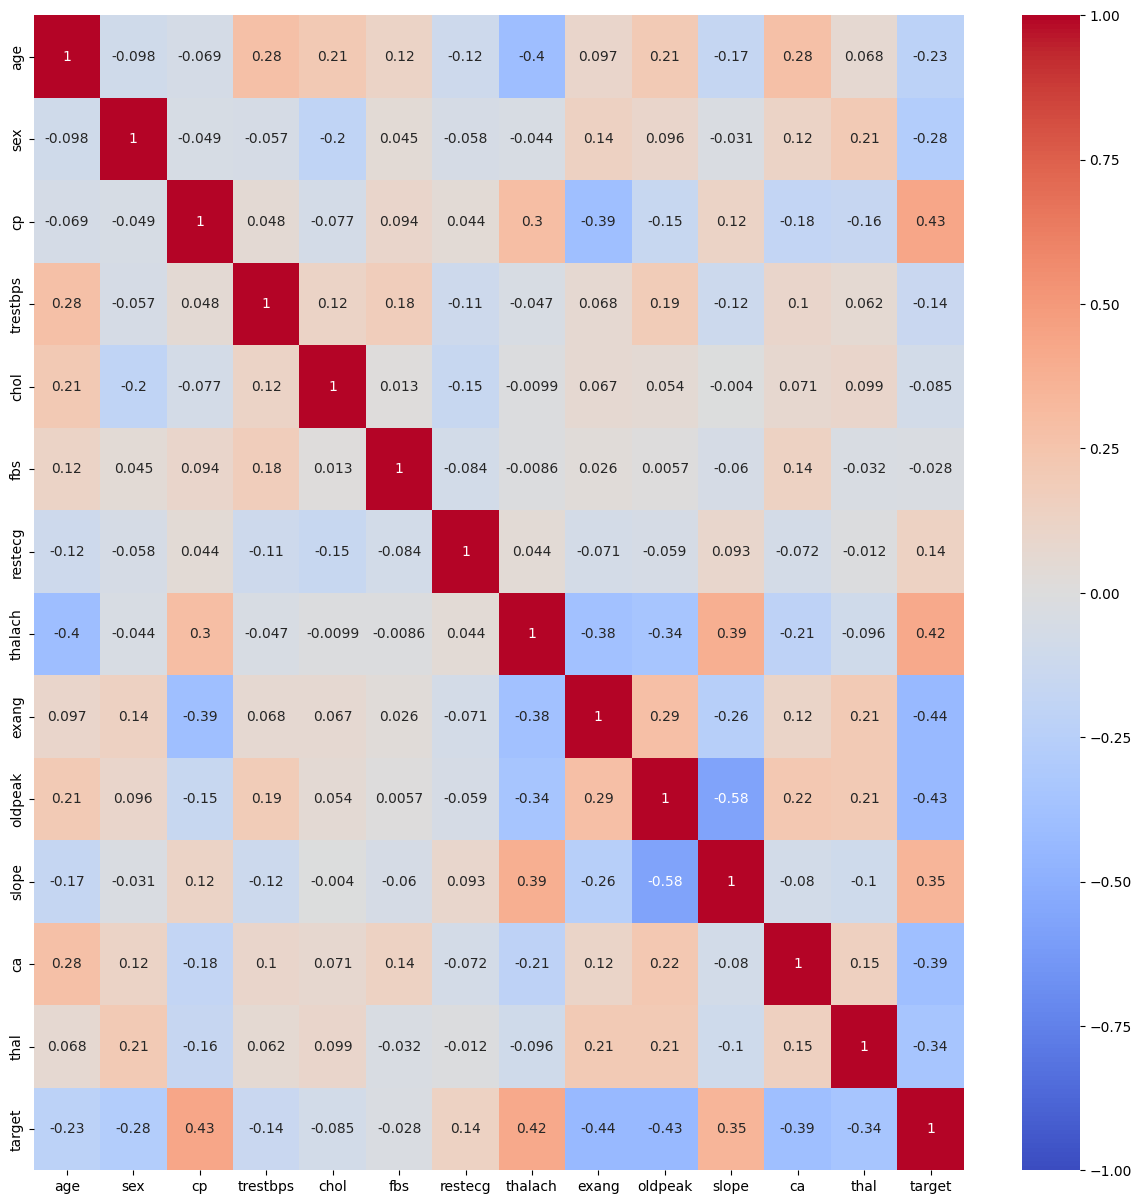

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data1.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

# **6. DATA PREPERATION**

In [ ]:
X = data1.drop(['target'],axis='columns')
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [ ]:
y = data1.target
y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [ ]:
len(y)

303

In [ ]:
len(X)

303

### Creating Training and Test sample variables.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# **7. MODEL BUILDING**

## 1. Naive Bayes classifier

In [ ]:
model_1 = MultinomialNB()
model_1.fit(X_train, y_train)
nb=model_1.score(X_test, y_test)
nb

0.7049180327868853

## 2. Logistic Regression Algorithm.

In [ ]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
lr=model_2.score(X_test, y_test)
lr

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7704918032786885

## 3. Random Forest Algorithm

In [ ]:
model_3 = RandomForestClassifier(n_estimators=30)
model_3.fit(X_train, y_train)
rf=model_3.score(X_test, y_test)
rf

0.7868852459016393

## 4. Decision Tree Algorithm

In [ ]:
model_4 = tree.DecisionTreeClassifier(criterion='entropy')
model_4.fit(X_train, y_train)
dt=model_4.score(X_train, y_train)
dt

1.0

## 5. Support Vector Machine

In [ ]:
model_5 = SVC()
model_5.fit(X_train, y_train)
sv=model_5.score(X_test, y_test)
sv

0.5901639344262295

# **8. MODEL COMPARISON**

## Comparing MAchine Learning Models using their scores.


In [ ]:
accuracy = [nb,lr,rf,dt,sv]
all_models = ['NaiveBayesClassifier','LogisticRegression','RandomForestClassifier','DecisonTreeClassifier','SVM']

score_df = pd.DataFrame({'Algorithms': all_models, 'Accuracy_Score': accuracy})
score_df.style.background_gradient(cmap="YlGnBu",high=1,axis=0)

,Algorithms,Accuracy_Score
0,NaiveBayesClassifier,0.704918
1,LogisticRegression,0.770492
2,RandomForestClassifier,0.786885
3,DecisonTreeClassifier,1.000000
4,SVM,0.590164


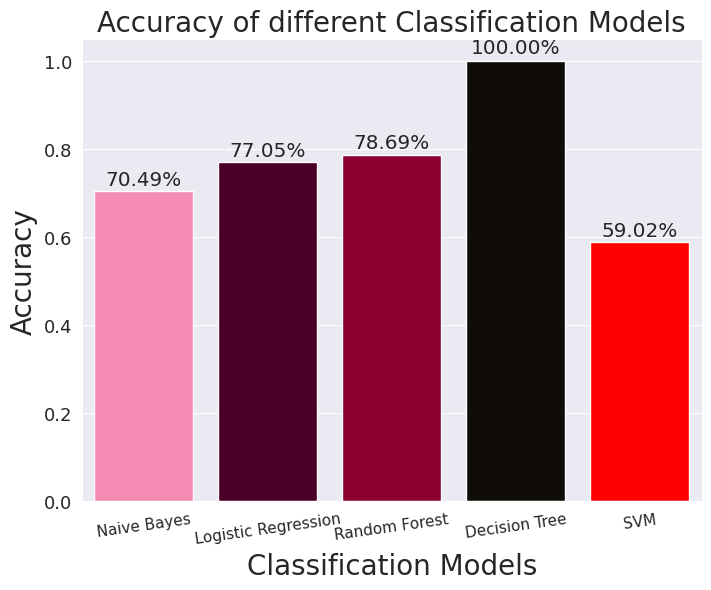

In [ ]:
mylist=[]
mylist2=[]
mylist.append(nb)
mylist2.append("Naive Bayes")
mylist.append(lr)
mylist2.append("Logistic Regression")
mylist.append(rf)
mylist2.append("Random Forest")
mylist.append(dt)
mylist2.append("Decision Tree")
mylist.append(sv)
mylist2.append("SVM")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
pal_style=['#F38BB2','#4C0028','#8A0030','#100C07','#FF0000']
ax = sns.barplot(x=mylist2, y=mylist, palette = pal_style, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()


## Decesion Tree Classifier showed highest score. Hence, it is decided to use it as the final model for prediction.

# **9. CASE PREDICTION**

## Dataset 1 to predict whether he has a Heart Disease or not.

age :  56
    
sex :  1(Female)
    
cp :  1
    
trestbps :  120
    
chol :  236
    
fbs :  0  (<120 mg/dl) 
    
restecg :  1
    
thalach :  178
    
exang :  0
    
oldpeak :  0.8
    
slope :  2
    
ca :  0
      
thal :  2

In [ ]:
model_4.predict([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### Observation:

###    From prediction using best model it can be seen that the patient has heart disease.

## Dataset 2 to predict whether he has a Heart Disease or not.

age :  57
    
sex :  1(Female)
    
cp :  0
    
trestbps :  130
    
chol :  131
    
fbs :  0  (<120 mg/dl) 
    
restecg :  1
    
thalach :  115
    
exang :  1
    
oldpeak :  1.2
    
slope :  1
    
ca :  1
      
thal :  3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_4.predict([[57,1,0,130,131,0,1,115,1,1.2,1,1,3]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

### Observation:

### From prediction using best model it can be seen that the patient has no heart disease detected.